In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

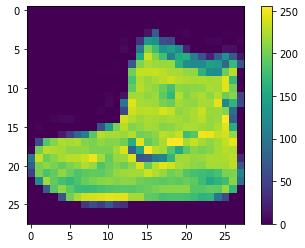

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

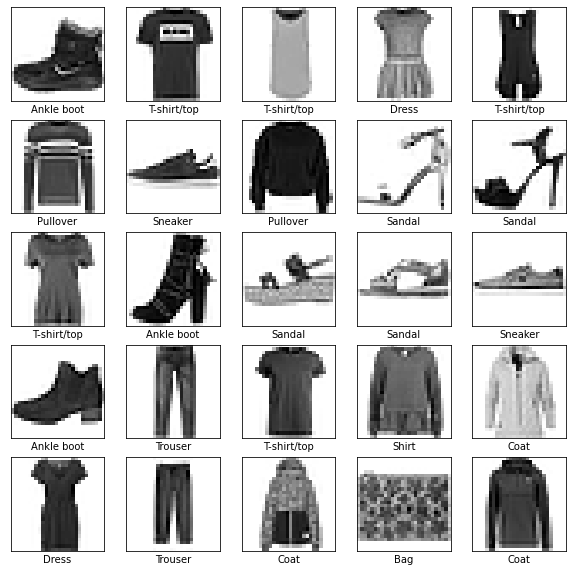

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4959 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3750 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3384 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.89 - 3s 2ms/step - loss: 0.2825 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9072
Epoch 10/10
1875/1875 [=================

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3370 - accuracy: 0.8831

Test accuracy: 0.8830999732017517


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)
predictions[0]

array([9.9293587e-08, 2.2472217e-07, 2.7077227e-10, 2.1217618e-08,
       4.2459966e-11, 6.5422687e-04, 4.3951419e-05, 6.1654177e-04,
       4.0374317e-08, 9.9868494e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

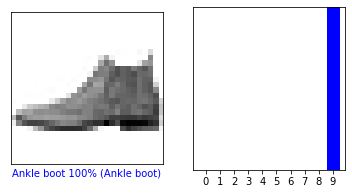

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

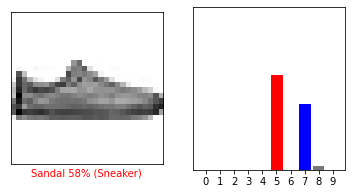

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

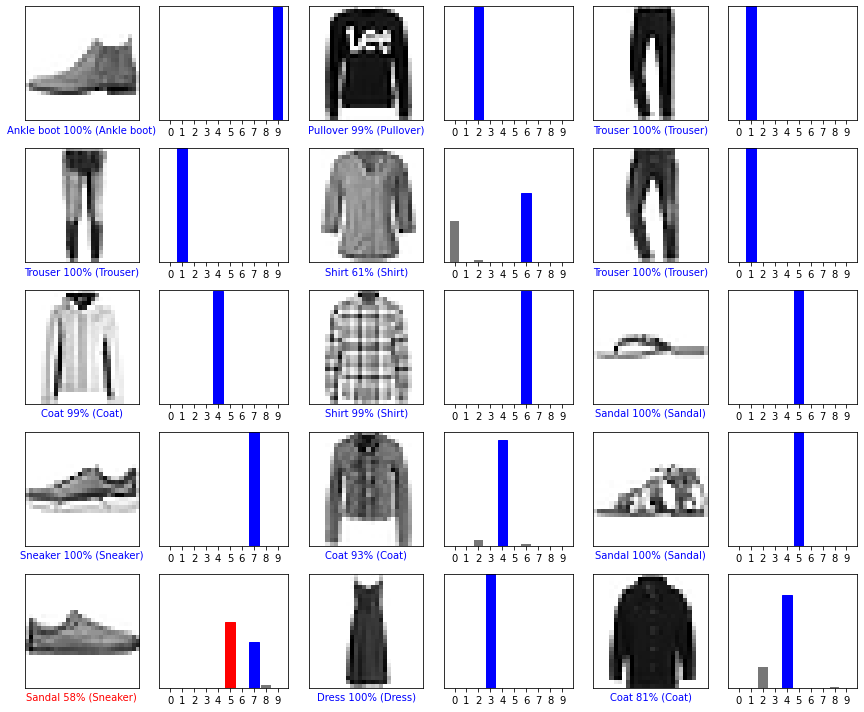

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
img = test_images[1]
img.shape

(28, 28)

In [27]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.5534467e-04 9.9653087e-13 9.9090588e-01 1.0830211e-11 7.9336977e-03
  4.2104570e-11 8.0509536e-04 1.0991133e-19 2.0702007e-09 9.7804785e-15]]


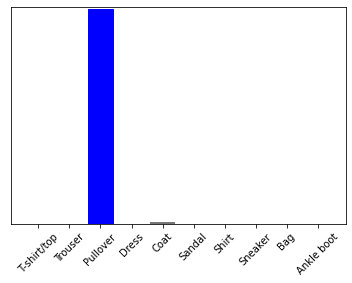

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)